In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Model
class NN:
    def __init__(self, layers):
        self.layers = layers
        self.n = len(layers)
        self.A = [np.zeros((x, 1)) for x in layers] 
        self.B = [np.zeros((x, 1)) for x in layers]
        self.W = [np.random.normal(0, 0.1, size=(layers[i], layers[i+1])) for i in range(self.n - 1)]

    def forward(self, X):
        self.A[0] = X
        
        for i in range(1, self.n):
            self.A[i] = sigmoid(self.W[i-1].T @ self.A[i-1] + self.B[i])

        return self.A[-1]  
    

# Optimizer
class GD:
    def __init__(self, lr):
        self.lr = lr

    def step(self, model, X, y):
        y_pred = model.forward(X)
        Error = y - y_pred

        for i in range(model.n-1, 0, -1):
            d_sigmoid = model.A[i] * (1 - model.A[i])
            d_Error = -2 * Error

            d_B = d_Error * d_sigmoid
            d_W = model.A[i-1] @ (d_sigmoid * d_Error).T
            d_A = model.W[i-1] @ (d_Error * d_sigmoid)

            model.B[i] -= self.lr * d_B
            model.W[i-1] -= self.lr * d_W
            Error = d_A #* self.lr


In [24]:
nn = NN([1, 2, 3, 2, 1])
optimizer = GD(1)

X = np.array([[1]])
y = [1]

losses = []
iterations = 1000

# before training
print(nn.forward(X))

for i in range(iterations):
    optimizer.step(nn, X, y)

    y_pred = nn.forward(X)
    loss = (y_pred - y) ** 2
    losses.append(loss)

# after training
print(nn.forward(X))
print("straty:", losses)

[[0.48521074]]
[[0.98292854]]
straty: [array([[0.17665754]]), array([[0.12159248]]), array([[0.08888029]]), array([[0.0686761]]), array([[0.05542258]]), array([[0.04622742]]), array([[0.03954319]]), array([[0.03449662]]), array([[0.0305673]]), array([[0.0274296]]), array([[0.0248709]]), array([[0.02274721]]), array([[0.02095795]]), array([[0.01943092]]), array([[0.01811305]]), array([[0.01696454]]), array([[0.01595496]]), array([[0.01506072]]), array([[0.01426322]]), array([[0.01354763]]), array([[0.01290199]]), array([[0.01231654]]), array([[0.01178325]]), array([[0.01129543]]), array([[0.01084751]]), array([[0.01043477]]), array([[0.01005321]]), array([[0.00969942]]), array([[0.00937045]]), array([[0.00906378]]), array([[0.00877718]]), array([[0.00850875]]), array([[0.0082568]]), array([[0.00801984]]), array([[0.00779656]]), array([[0.0075858]]), array([[0.00738653]]), array([[0.00719782]]), array([[0.00701884]]), array([[0.00684886]]), array([[0.0066872]]), array([[0.00653327]]), ar

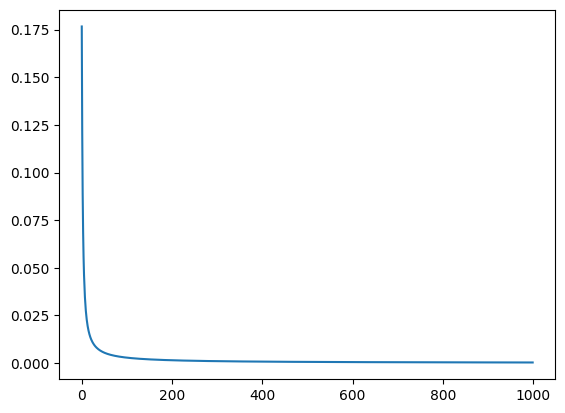

In [25]:
flat_losses = [loss[0] if isinstance(loss, np.ndarray) else loss for loss in losses]
plt.plot(flat_losses)